In [1]:
from pandas_datareader import data
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
stocks = ['ABBN.VX','CSGN.VX','NESN.VX','NOVN.VX']

start_date = '2003-10-27'
end_date = '2017-04-11'

for stock in stocks:
    if stock == 'ABBN.VX':
        data_yahoo = data.DataReader(stock, 'yahoo', start_date, end_date)
        data_yahoo = data_yahoo.drop(columns=['High','Low','Open','Close','Volume'])
        data_yahoo = data_yahoo.rename(columns={'Adj Close':stock})
    else:
        data_yahoo_temp = data.DataReader(stock, 'yahoo', start_date, end_date)
        data_yahoo[stock] = data_yahoo_temp['Adj Close']
data_yahoo = data_yahoo / data_yahoo.iloc[0] * 100

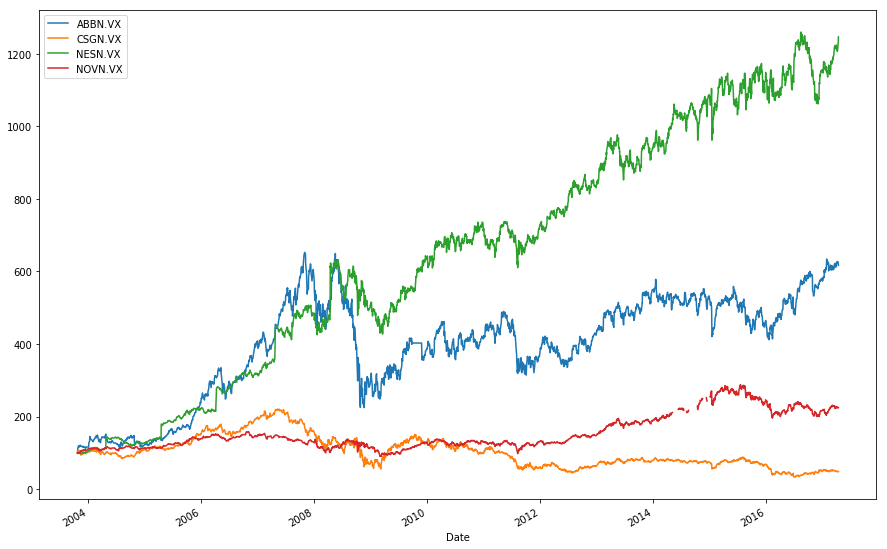

In [3]:
data_yahoo.plot(figsize=(15,10))

In [4]:
data_yahoo_sign = np.sign(np.log(data_yahoo).diff()).iloc[1:]
data_yahoo_sign.columns = ['ABBN','CSGN','NESN','NOVN']

In [19]:
data_yahoo_sign['ABBN'].loc['2016-09-08':'2016-09-14'].cumsum()

Date
2016-09-08    1.0
2016-09-09    0.0
2016-09-12   -1.0
2016-09-13    0.0
2016-09-14   -1.0
Name: ABBN, dtype: float64